# Descripcion del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Tabla de Contenido

1. [Inicialización](#Inicialización)
2. [Preparar los datos](#Preparar-los-datos)
3. [Games](#Games)
    1. [Reemplaza los nombres de las columnas (ponlos en minúsculas).](#Reemplaza-los-nombres-de-las-columnas)
    2. [Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.](#Describe-los-tipos-de-datos)
    3. [Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego.](#Ventas-totales)
4. [Analiza los datos](#Analiza-los-datos)
    1. [Juegos lanzados en diferentes años.](#Juegos-lanzados-en-diferentes-años)
    2. [Variación de ventas por plataforma.](#Ventas-por-plataforma)
    3. [Correlación entre reseñas y ventas.](#Correlacion-reseñas-ventas)
    4. [Distribución de juegos por género.](#Distribucion-por-genero)
5. [Perfil de usuario para cada región](#Perfil-de-usuario)
6. [Prueba de hipótesis](#Prueba-de-hipotesis)
    1. [Calificaciones de usuarios para Xbox One y PC.](#Calificaciones-Xbox-PC)
7. [Conclusión general](#Conclusión-general)

## Inicializacion
Abre el archivo de datos y estudia la información general 


In [1]:
# Cargar todas las librerías
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Carga el  archivos de datos del DataFrame
df_games = pd.read_csv("C:\\Users\\HP\\Downloads\\games.csv", header=0)

## Preparar los datos

## Games

###   Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [3]:
#Cambiar el el nombre de las columnas a minusculas
df_games.columns = df_games.columns.str.lower()

In [4]:
# Imprime la información general/resumida sobre el DataFrame games
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(df_games))

Primera filas:
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 

### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

In [5]:
#Analizar si existen duplicados en la columna name
def check_duplicates_column(datos, column_name):
    if column_name in datos.columns:
        duplicates= datos[column_name].duplicated().sum()
        print(f'Columna: {column_name} - valores duplicados: {duplicates}')
        print(f'Primeros 5 valores de la columna "{column_name}":')
        print(datos[column_name])
check_duplicates_column(df_games, 'name')

    

Columna: name - valores duplicados: 5155
Primeros 5 valores de la columna "name":
0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 16715, dtype: object


Se tienen 5155 duplicados en la columna name pero no afectan realmente a nuestro analisis ya que se puede tener el mismo juego pero en diferente plataforma tendra otra critica subjetiva dependiendo la consula por ejemplo si hay diferencia en cuantos alas graficas o si presenta otro tipo de fallas.

In [6]:
deceptive_duplicates = df_games[df_games.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)]
if not deceptive_duplicates.empty:
    print('Duplicados engañosos encontrados:')
    print(deceptive_duplicates)
else:
    print('No se encontraron duplicados engañosos')

Duplicados engañosos encontrados:
                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
659              NaN      GEN           1993.0     NaN      1.78      0.53   
14244            NaN      GEN           1993.0     NaN      0.00      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E  


Se observaron 2 videojuegos duplicados, pero lo interesante es que no pueden ser eliminados ya que hay diferencias en la ventas tanto en na,eu y jp repectivamente.

In [7]:
#Se analiza si en la columna de platform hay nombres mal escritos por ejemplo Wii
wii_count_upper = (df_games['platform'] == 'Wii').sum()
print(f"Número de juegos en la plataforma 'Wii': {wii_count_upper}")
print()
wii_count_lower= (df_games['platform'] == 'wii').sum()
print(f"Número de juegos en la plataforma 'wii': {wii_count_lower}")

Número de juegos en la plataforma 'Wii': 1320

Número de juegos en la plataforma 'wii': 0


In [8]:
# La columna name rellenar con 0 los valores ausentes
df_games['name'].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13348\1480070705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['name'].fillna(0, inplace=True)


In [9]:
# La columna genre rellenar con 0 los valores ausentes
df_games['genre'].fillna(0, inplace=True)
print(df_games['genre'])

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16710          Action
16711          Sports
16712       Adventure
16713        Platform
16714      Simulation
Name: genre, Length: 16715, dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_13348\2880353641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['genre'].fillna(0, inplace=True)


In [10]:
# La columna year_of_release rellenar con 0 los valores ausentes y convertir a numeros enteros
df_games['year_of_release'].fillna(0, inplace=True)
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
print(df_games['year_of_release'].dtype)

int32


C:\Users\HP\AppData\Local\Temp\ipykernel_13348\2570756903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['year_of_release'].fillna(0, inplace=True)


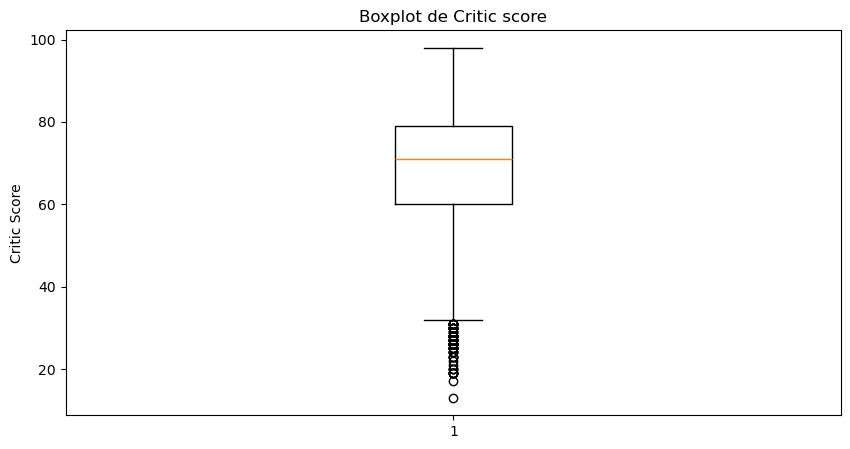

In [11]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_games['critic_score'].dropna())
plt.title('Boxplot de Critic score')
plt.ylabel('Critic Score')
plt.show()

In [12]:
tbd_count = df_games['user_score'].value_counts().get('tbd', 0)
print('Numero de valores de TBD en user_score:', tbd_count)

Numero de valores de TBD en user_score: 2424


Tiene un numero considerable de TBD pero la columna presenta un gran numero de valores ausentes y es preferible dejar asi para que no afecte nuestro analisis

Tanto la columna user_score tiene 6701 valores ausentes (aprox 40% ) y critic_score: 8578 valores ausentes (apro el 50 %) al tener un numero significativo rellenarlo puede afectar nuestro analisis

In [13]:
df_games['rating'].fillna('unknown', inplace=True)
missing_rating = df_games['rating'].isna().sum()
print('Numero de valores ausentes en la columna rating despues del cambio:', missing_rating)

Numero de valores ausentes en la columna rating despues del cambio: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_13348\335276793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['rating'].fillna('unknown', inplace=True)


¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles. 
Columna name: pudo haber un error en la recopilacion de los datos
columna year of release: algunos juegos pueden ser antiguos y no se sepa la fecha de lanzamiento y/o error en recopilacion de datos
columna genre: algunos juegos puede que no se sepa exactamente a que genero pertenezca
columna critic score: los juegos no tienen critica por distintas razones falta de interes, no son conocidos y juegos antiguos no se tiene crticas registradas
columna user score puede que no existan opiniones de jugadores
columna rating : puede que algunos juegos no tengan una clasificacion oficial o no se haya un recopilacion de los datos

### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [14]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
print(df_games[['name', 'total_sales']].head())

                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


In [15]:
print(df_games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score   rating  \
0     28.96      3.77         8.45          76.0          8        E   
1      3.58      6.81         0.77           NaN        NaN  unknown   
2     12.76      3.79         3.29          82.0        8.3        E   
3     10.93      3.28         2.95          80.0          8        E   
4      8.89     10.22         1.00           NaN        NaN  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.

In [16]:
#Convertir user_score a numerico
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
# Contar valores nulos antes de la imputacion
missing_before = df_games['user_score'].isna().sum()
# Calcular la media antes de la imputacion
mean_before = df_games['user_score'].mean()
print('Valores nulos antes de la imputacion:', missing_before)
print('Media antes de la imputacion:', mean_before)

Valores nulos antes de la imputacion: 9125
Media antes de la imputacion: 7.125046113306982


In [17]:
# Calcular la media de user_score por genre
mean_user_score = df_games.groupby('genre')['user_score'].mean()
# Imputar los valores faltantes en user_score con la media por genero
for genre, mean_score in mean_user_score.items():
    df_games.loc[(df_games['user_score'].isnull()) & (df_games['genre'] == genre), 'user_score'] = mean_score
# Comprobar si hay valores nulos restantes
remaining_missing = df_games['user_score'].isna().sum()
print('Numero de valores ausentes en user_score despues de la imputacion:', remaining_missing)

Numero de valores ausentes en user_score despues de la imputacion: 2


In [18]:
missing_after = df_games['user_score'].isna().sum()
# Calcular la media despues de la imputacion
mean_after = df_games['user_score'].mean()
print('Valores nulos despues de la imputacion:', missing_after)
print('Media despues de la imputacion:', mean_after)

Valores nulos despues de la imputacion: 2
Media despues de la imputacion: 7.114992842945292


In [19]:
# Imputar los valores nulos restantes en user_score con 0
df_games['user_score'].fillna(0, inplace=True)
#Comprobar si hay valores nulos restantes
remaining_missing = df_games['user_score'].isna().sum()
print('Numero de valores ausentes en user_score despues de rellenar con 0:', remaining_missing)
# Calcular la nueva media de user_score despues de la imputación
mean_user_score_final = df_games['user_score'].mean()
print('La media de user_score después de imputar con 0 es:', mean_user_score_final)

Numero de valores ausentes en user_score despues de rellenar con 0: 0
La media de user_score después de imputar con 0 es: 7.114141512661961


C:\Users\HP\AppData\Local\Temp\ipykernel_13348\942669072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['user_score'].fillna(0, inplace=True)


Al realizar la imputacion multiple de la columna user_score con la columna genre coincio en cuanto a medias no afecto son similares antes y despues de la imputacion asi que en lugar de dejar la mitad en NaN para un mejor analisis se realizo la imputacion 

In [20]:
# Asegurarnos de que critic_score sea numerico
df_games['critic_score'] = pd.to_numeric(df_games['critic_score'], errors='coerce')
# Calcular la media de critic_score
mean_critic_score = df_games['critic_score'].mean()
print('La media de critic_score es:', mean_critic_score)

La media de critic_score es: 68.96767850559173


In [21]:
# Calcular la media de critic_score por género
mean_critic_scores = df_games.groupby('genre')['critic_score'].mean()
for genre, mean_critic in mean_critic_scores.items():
    df_games.loc[(df_games['critic_score'].isnull()) & (df_games['genre'] == genre), 'critic_score'] = mean_critic
#Comprobar si hay valores nulos restantes
remaining_missing = df_games['critic_score'].isna().sum()
print('Numero de valores ausentes en critic_score despues de la imputacion:', remaining_missing)
# Calcular la nueva media de critic_score después de la imputacion
mean_critic_score_final = df_games['critic_score'].mean()
print('La media de critic_score después de la imputación es:', mean_critic_score_final)



Numero de valores ausentes en critic_score despues de la imputacion: 2
La media de critic_score después de la imputación es: 68.75978961660628


In [22]:
# Imputar los valores nulos restantes en critic_score con 0
df_games['critic_score'].fillna(0, inplace=True)
#Comprobar si hay valores nulos restantes
remaining_critic_missing = df_games['critic_score'].isna().sum()
print('Numero de valores ausentes en user_score despues de rellenar con 0:', remaining_critic_missing)
# Calcular la nueva media de critic_score después de la imputacion
mean_citic_score_final = df_games['critic_score'].mean()
print('La media de user_score después de imputar con 0 es:', mean_critic_score_final)

Numero de valores ausentes en user_score despues de rellenar con 0: 0
La media de user_score después de imputar con 0 es: 68.75978961660628


C:\Users\HP\AppData\Local\Temp\ipykernel_13348\243442289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['critic_score'].fillna(0, inplace=True)


Se hizo la comparacion de la media de critic_score con la media despues la imputacion con la columna genre son practicamente similares solo varian por decimas con esto ayuda a analisis que dejarlos como valores ausentes asi ya presentan un tratamiento adecuado

In [23]:
# Imprime la información general/resumida sobre el DataFrame games
def second_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(second_lookup(df_games))

Primera filas:
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45     76.000000    8.000000        E   
1      3.58      6.81         0.77     68.058350    7.301402  unknown   
2     12.76      3.79         3.29     82.000000    8.300000        E   
3     10.93      3.28         2.95     80.000000    8.000000        E   
4      8.89     10.22         1.00     72.652646    7.619515  unknown   

   total_sales  
0        82.54  
1        40.24  
2       

## Analiza los datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [24]:
games_per_platform = df_games['platform'].value_counts().sort_index()
print(games_per_platform )

platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: count, dtype: int64


In [25]:
games_per_year= df_games['year_of_release'].value_counts().sort_index()
print(games_per_year)

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64


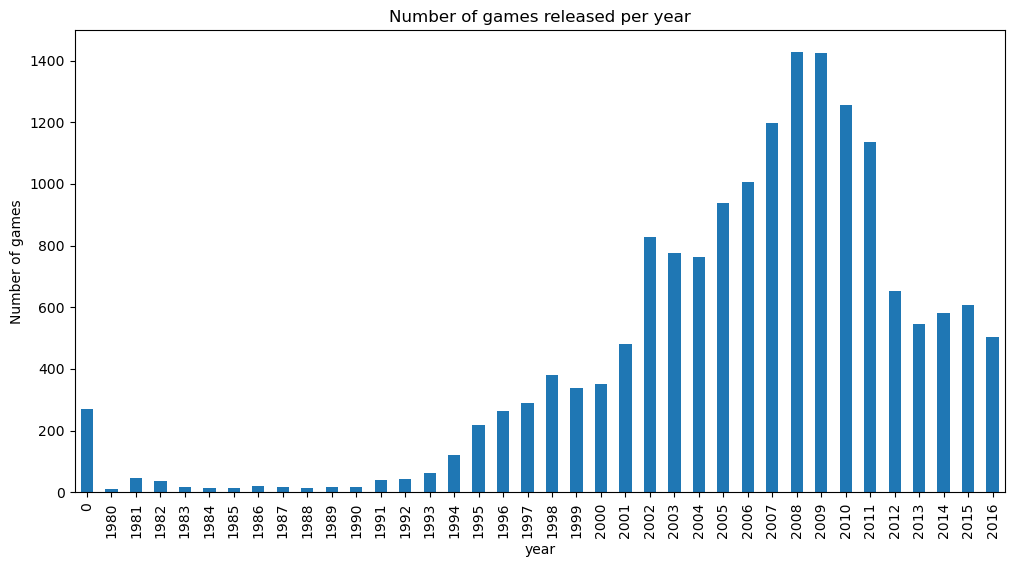

In [26]:
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', x='year', y= 'Number of games')
plt.title('Number of games released per year')
plt.xlabel('year')
plt.ylabel('Number of games')
plt.show()

Mediante el grafico de barras se puede observar que apartir del año 2001 se ve crecimiento en el numero de videojuegos lazandos cada año hasta llegar al años 2010, apartir del año del año 2011 hasta 2016 presenta picos ya que una de las razones puede ser que los consuidores ya juegan juegos en linea fue disminuyendo con el tiempo ya comprar videojuegos o solo los consumidores mas fieles qie prefieren seguir utilizando este tipo de videojuegos.

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [27]:
#Filtrar datos solo de 2011-2016
df_games_filtered= df_games[(df_games['year_of_release']>= 2011) & (df_games['year_of_release'] <=2016)]

In [28]:
#Plataformas con mayores ventas totales
platform_sales= df_games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)#Agrupar por plataforma y sumar las ventas totales
popular_platform = platform_sales.head(10).index.tolist()#Seleccionar 10 plataformas mas poulares
sales_year_popular_platform = df_games_filtered[df_games_filtered['platform'].isin(popular_platform)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

print("Ventas totales por plataforma:")
print(platform_sales)

print("\nVentas anuales por plataforma popular:")
print(sales_year_popular_platform)

Ventas totales por plataforma:
platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64

Ventas anuales por plataforma popular:
platform           3DS     DS     PC     PS3     PS4    PSV    Wii   WiiU  \
year_of_release                                                             
2011             63.20  26.18  35.03  156.78     NaN   4.63  59.65    NaN   
2012             51.36  11.01  23.22  107.36     NaN  16.19  21.71  17.56   
2013             56.57   1.54  12.38  113.25   25.99  10.59   8.59  21.65   
2014             43.76    NaN  13.28   47.76  100.00  11.90   3.75  22.03   
2015             27.78    NaN   8.52   16.82  118.90   6.25   1.14  16.35   
2016             15.14    NaN   5.25    3.60   69.25   4.25   0.18   4.60   

platform           X360   XOne  
year_of_release                 
2011             143.84

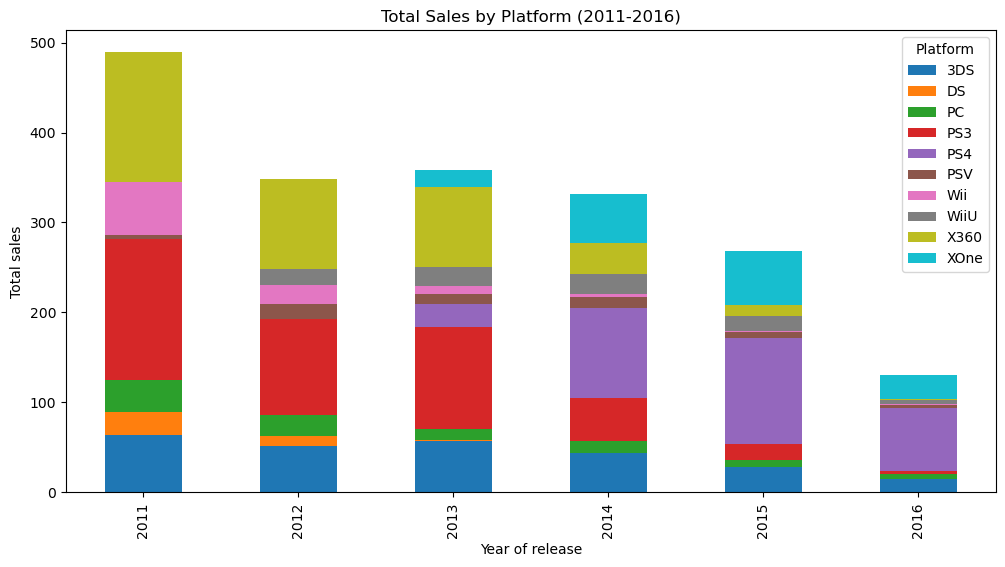

In [29]:
sales_year_popular_platform.plot(kind= 'bar',stacked =True, xlabel = 'year of release', ylabel= 'total_sales', figsize=(12, 6))
plt.title('Total Sales by Platform (2011-2016)')
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.legend(title='Platform')
plt.show()

El grafico nos muestra las ventales totales vs el año de lanzamiento (5 años) que platafomas tienes mayores ventas, cuales fueron diminuyendo,desaparenciendo practicamente, cuales fueron apareciendo

In [30]:
#Filtrar plataformas populares sin ventas recientes
latest_year_with_sales = sales_year_popular_platform.loc[2016]
popular_platforms_without_sales = latest_year_with_sales[latest_year_with_sales == 0].index.to_list()
print("Popular platforms without recent sales:", popular_platforms_without_sales)

Popular platforms without recent sales: []


Nos indica que las plataformas populares tuvieron al menos alguna venta, dentro de este lapso de tiempo establecido de 2011 a 2016 

In [31]:
#Hallar los años de lanzamiento de cada plataforma
platform_release_years = df_games_filtered.groupby('platform')['year_of_release'].min().sort_values().reset_index()
platform_release_years['years_since_last'] = platform_release_years['year_of_release'].diff() #calcular el tiempo entre lanzamiento de consolas
df_games_filtered = df_games_filtered.merge(platform_release_years[['platform', 'years_since_last']], on='platform', how='left')
avg_time_releases= platform_release_years['years_since_last'].mean()
print('Tiempo promedio entre el lanzamiento de plataformas nuevas:', avg_time_releases)


Tiempo promedio entre el lanzamiento de plataformas nuevas: 0.18181818181818182


 El tiempo promedio entre el lanzamiento de nuevas plataformas aproximadamente 2 meses esto se debe a muchas razones que el tiempo es relativamente poco debido a la competencia en el mercado con las distitnas plataformas, el avance de la tecnologia en el desarrollo de videojuegos

In [32]:
#Añadir el año de lanzamiento de cada plataforma en el DataFrame
df_games_filtered['year_of_release_platform'] = df_games_filtered.groupby('platform')['year_of_release'].transform('min')
df_games_filtered['year_of_last_sale_platform'] = df_games_filtered.groupby('platform')['year_of_release'].transform('max')#Agregar el ultimo año de venta  de cada plataforma
df_games_filtered['active_years_platform'] = df_games_filtered['year_of_last_sale_platform'] - df_games_filtered['year_of_release_platform']
avg_disappearance_time = df_games_filtered['active_years_platform'].mean()
print('Tiempo promedio que tardan en desaparecer las plataformas:', avg_disappearance_time)

Tiempo promedio que tardan en desaparecer las plataformas: 4.422178020885132


Aproximadamente 4 años con algunos meses tardan en desaparecer ya que despues de estos sus ventas bajaron considerablemente o no tienen ventas y ya no tiene relevancia en el mercado esta plataforma pero es un tiempo estimado puede varias dependiendo la plataforma y diversos factores

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [33]:
platform_sales = df_games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platform = platform_sales.head(5)
print('Plataformas populares:\n', top_platform)

Plataformas populares:
 platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
Name: total_sales, dtype: float64


In [34]:
#Calcular las ventas populares por año
sales_year_popular_platform = (
    df_games_filtered[df_games_filtered['platform'].isin(popular_platform)]
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .reset_index()
)
print(sales_year_popular_platform.head())


   year_of_release platform  total_sales
0             2011      3DS        63.20
1             2011       DS        26.18
2             2011       PC        35.03
3             2011      PS3       156.78
4             2011      PSV         4.63


In [35]:
#Clasificar la tendencia de crecimiento
def classify_growth_trend(sales_growth):
    if sales_growth > 0:
        return 'Creciente'
    elif sales_growth < 0:
        return 'Decreciente'
    else:
        return 'Estable'
    # Calcular el crecimiento de las ventas
sales_year_popular_platform = sales_year_popular_platform.sort_values(['platform', 'year_of_release'])
sales_year_popular_platform['previous_year_sales'] = sales_year_popular_platform.groupby('platform')['total_sales'].shift(1)
sales_year_popular_platform['sales_growth'] = sales_year_popular_platform['total_sales'] - sales_year_popular_platform['previous_year_sales']
sales_year_popular_platform['growth_trend'] = sales_year_popular_platform['sales_growth'].apply(classify_growth_trend)

print(sales_year_popular_platform[['platform', 'year_of_release', 'total_sales', 'sales_growth', 'growth_trend']])


   platform  year_of_release  total_sales  sales_growth growth_trend
0       3DS             2011        63.20           NaN      Estable
7       3DS             2012        51.36        -11.84  Decreciente
15      3DS             2013        56.57          5.21    Creciente
25      3DS             2014        43.76        -12.81  Decreciente
34      3DS             2015        27.78        -15.98  Decreciente
43      3DS             2016        15.14        -12.64  Decreciente
1        DS             2011        26.18           NaN      Estable
8        DS             2012        11.01        -15.17  Decreciente
16       DS             2013         1.54         -9.47  Decreciente
2        PC             2011        35.03           NaN      Estable
9        PC             2012        23.22        -11.81  Decreciente
17       PC             2013        12.38        -10.84  Decreciente
26       PC             2014        13.28          0.90    Creciente
35       PC             2015      

En la columan sales_growth presenta NaN son en plataformas donde es el primer juego de la plataforma y significa que no hay venta anterior a esta 

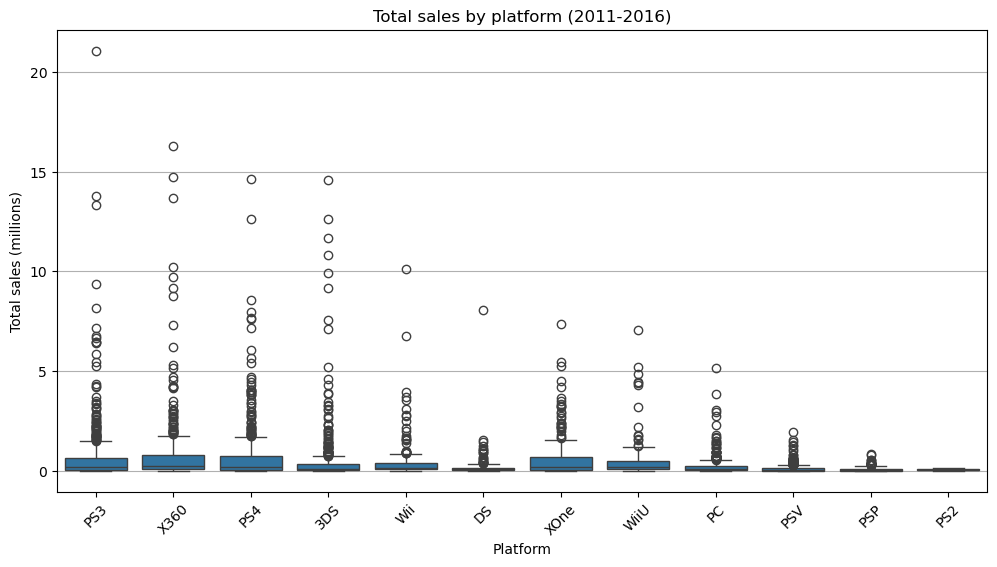

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data= df_games_filtered, x='platform', y='total_sales')
plt.title('Total sales by platform (2011-2016)' )
plt.xlabel('Platform')
plt.ylabel('Total sales (millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Observando el grafico que abarca de 2011-2016 de ventas totales vs plataforma
1. Mayores ventas como lo son PS3, X360 y PS4 son las plataformas con donde tienen videoujegos con mayores ventas, tales colo PS3 que sobrepasa los 20 millones 
2. Plataformas con menores ventas PSP, PS2 tiene ventas muy bajas menores a los 5 millones esto se debe a que ya no hubo actualizacion con videojuegos quedaron descontinuados y con el tiempo se quedaron obsoletos 
3. Los outliers presentan videojuegos  tienen ventas inusualmente altas en la misma plataforma
4. Las ventas promedio altas en plataformas como PS3, X360, PS4, tienen cajas mas arriba en el eje de ventas totales
5. Ventas promedio medias o bajas como las plataformas WiiU, PC, PSV,PSP tienen cajas mas abajo en el eje de ventas totales que indica videojuego con ventas mas baja en comparacion con otras plataformas

In [37]:
sales_stats = df_games_filtered.groupby('platform')['total_sales'].agg(['mean', 'std', 'count', 'median', 'var'])
print(sales_stats)

              mean       std  count  median       var
platform                                             
3DS       0.503535  1.441271    512    0.12  2.077262
DS        0.210489  0.636579    184    0.08  0.405233
PC        0.251105  0.505710    389    0.08  0.255743
PS2       0.064286  0.042762      7    0.06  0.001829
PS3       0.629336  1.451388    708    0.21  2.106528
PS4       0.801378  1.609456    392    0.20  2.590350
PSP       0.092981  0.116731    312    0.04  0.013626
PSV       0.125431  0.212341    429    0.05  0.045089
Wii       0.482335  1.059069    197    0.17  1.121628
WiiU      0.559116  1.058836    147    0.22  1.121133
X360      0.763815  1.637090    498    0.27  2.680063
XOne      0.645020  1.036139    247    0.22  1.073584


Desglosando las estadisticas de las ventas totales por plataforma 
1. Media indica el valor promedio de las ventas totales por plataforma como lo son PS4 con 0.80 millones y  X360 con 0.76 millones con un buen rendimiento en cuanto a ventas
2. La desviacion estadar indica la dispersion en ventas comparada con la media como el X360 tiene una variabilidad 1.63  con ventas variadas
3. La cantidad de videojuegos por plataforma durante el lapso de 2011-2016 como en PS3 con 708 y con PS2 que tuvo 7
4. Mediana nos dice por ejemplo PS4 0.20  el 50% de los videojuegos se vendio menos de 0,21 millones y el 50% vendio mas
5. Varianza la dispersion de ventas tiene datos mas dispersos de la media como PS4 2.59  que tuvo diferencias en las ventas en cuanto a los videojuegos 

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

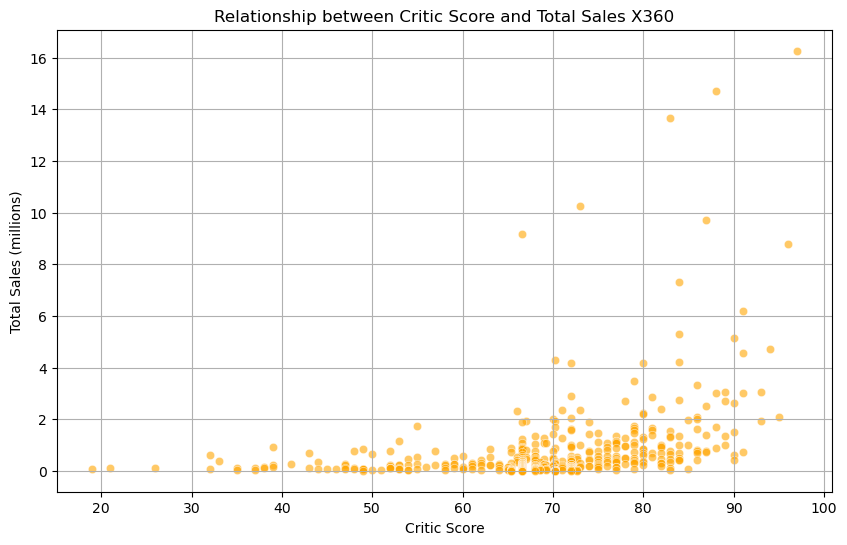

In [38]:
x360_data = df_games_filtered[df_games_filtered['platform']== 'X360']
#Grafico de dispersion de critic_score vs ventas totales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=x360_data, x='critic_score', y='total_sales', color='orange', alpha=0.6)
plt.title('Relationship between Critic Score and Total Sales X360')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.grid()
plt.show()

Este grafico de dispersion entre el puntaje critic score  y total sales para la plataforma de X360 
1. Presenta una tendencia positiva ya que apuntajes mas alto mayores ventas aunque no es totalemnte lineal
2. No todos los videojuegos con buena critica tiene ventas altas, incluso son de venta promedio o hasta baja es indica que un buen puntaje en cuanto a la critica no significa ventas altas
3. Los videojuegos con la puntaje de 60 tienen ventas menores a 2 millones esto tienen que a menor puntaje menores ventas

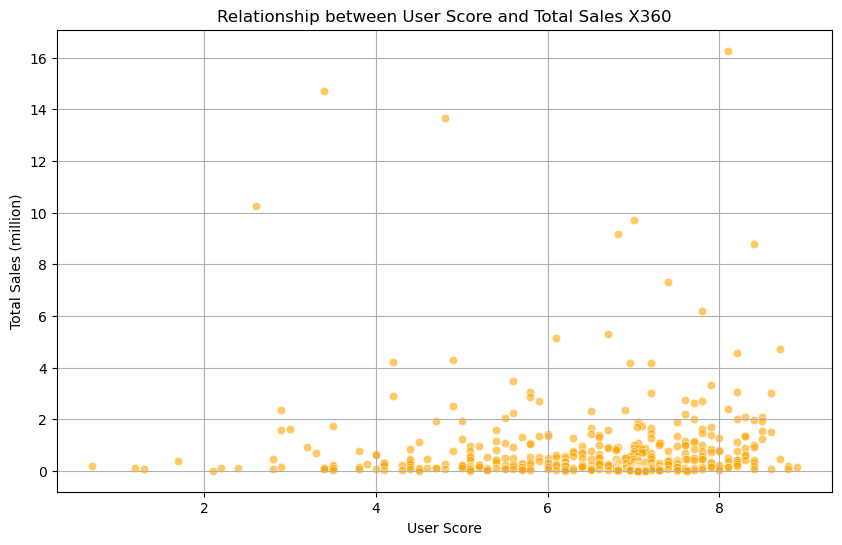

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=x360_data, x='user_score', y='total_sales', color='orange', alpha=0.6)
plt.title('Relationship between User Score and Total Sales X360')
plt.xlabel('User Score')
plt.ylabel('Total Sales (million)')
plt.grid()
plt.show()

Este grafico de dispersion entre el puntaje de user score y total sales para la plataforma de X360
1. Relacion debil entre el puntaje de user score y total sales por ejemplo puntajes de 8 no necesariamente tienen ventas altas y puntajes menos de 5 tienen ventas similares a puntajes altos o hasta mayores que los puntajes altos
2. los videojuegos con puntaje entre 5 y 8 se concentran con ventas menores de 2 millones de dolares dominan en cuanto a cantidad pero no destacan en ventas mayores
3. Algunos videojuegos con ventas superiores a los 10 millones de dolares aunque no necesariamente tiene puntajes altos sino que puntajes bajos puede ser una franquicia valorada con los usuarios que tuvo buena campaña de marketing, pero al calificarla no le fue muy bien

In [40]:
corr_critic = x360_data['critic_score'].corr(x360_data['total_sales'])
corr_user = x360_data['user_score'].corr(x360_data['total_sales'])
print('Correlacion entre critic score y total sales:', corr_critic)
print()
print('Correlacion entre user score y total sales:', corr_user)


Correlacion entre critic score y total sales: 0.37422791529487115

Correlacion entre user score y total sales: -0.006872299215691651


Pára critic score tiene una tendecia positiva con total sales a medida que aumentan las calificaciones de los profesionales tambien aumentan las ventas significa que los consumidores confian en lo que los criticos opinan o este caso califican sobre el videojuego y asi confian mas y compran los videojuegos.
Para user score no hay ninguna correlacion entre total sales significa que las calificaciones de los usuarios son importantes pero no son determinante en cuanto a ventas confian mas en la critica de un experto 

In [41]:
game_counts = df_games_filtered.groupby('name').size()
multi_platform_games = df_games_filtered[df_games_filtered['name'].isin(game_counts[game_counts > 1].index)]
multi_platform_games = multi_platform_games.reset_index(drop=True)
comparison_sales_platforms = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().unstack(fill_value=0)
print(comparison_sales_platforms)


platform                              3DS    DS    PC  PS2   PS3   PS4  PSP  \
name                                                                          
 Frozen: Olaf's Quest                0.59  0.51  0.00  0.0  0.00  0.00  0.0   
2014 FIFA World Cup Brazil           0.00  0.00  0.00  0.0  0.61  0.00  0.0   
3rd Super Robot Wars Z Jigoku Hen    0.00  0.00  0.00  0.0  0.23  0.00  0.0   
3rd Super Robot Wars Z: Tengoku-Hen  0.00  0.00  0.00  0.0  0.15  0.00  0.0   
7 Days to Die                        0.00  0.00  0.00  0.0  0.00  0.14  0.0   
...                                   ...   ...   ...  ...   ...   ...  ...   
Zumba Fitness Core                   0.00  0.00  0.00  0.0  0.00  0.00  0.0   
Zumba Fitness: World Party           0.00  0.00  0.00  0.0  0.00  0.00  0.0   
[Prototype 2]                        0.00  0.00  0.11  0.0  0.74  0.00  0.0   
de Blob 2                            0.00  0.11  0.00  0.0  0.21  0.00  0.0   
uDraw Studio: Instant Artist         0.00  0.00  0.0

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [42]:
genre_sales = df_games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sales, dtype: float64


Generos con ventas altas lo que nos dice que aventura: los jugadores es el genero extremadamente preferido por el consumido donde pueden contener uso de habildades del personaje ficticio, el uso de armas pero con una historia esto los hace sumamente populares e interesantes
b)Shooter los videojuegos de disparos en su version primera persona y multijugador donde lo interesante son las misiones. uso de armas, estrategia, estar en equipos para lograr misones ganando armas y puntos es lo interesante de los videjuegos
c) Role-Playing son videojuegos de fantasia donde el personaje es complejo con una profunda historia y narrativa donde debe de aplicar la imaginacion y ser muy intuitivo en este tipo de juegos por eso estos generos comandan las ventas al publico le gusta lo irreal como el juego de disparo, fantasia son cosas que no pueden hacer en su vida diaria
Las genero con ventas mas bajas como strategy y puzzle  tiene un interes mas limitado aunque antes en los 2000 o incluso a finales de los 80's los juegos mas vendidos eran de este tipo donde se usaba mas la inteligencia, intuicion, imaginacion, creatividad tenian historias interesantes y uno como consumidor aprendia mucho y era juegos mas sanos en conjunto con los de deportes pero se fue revolucionando la industria y ahora estos de mas violencia son mas redituables.


Los generos mas rentables es porque genera interaccion social gracias a su version en linea o su modo cooperativo , el diseño de los desarrolladores  en mejores graficos,inovaccion y actualizaciones en los videouejos despierta mas el interes de los consumidores estos ultimos años, pero lo mas probable es que cambie en unos 10 años las preferencias.

## Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:
Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [43]:
#Filtrar datos para  las columnas de ventas por region
regions =['na_sales', 'eu_sales', 'jp_sales']
region_names = ['NA', 'EU', 'JP']
top_platforms_per_region = {}
for region, name in zip (regions, region_names):
    #Agrupar por plataforma y sumar las ventas totales
    platform_sales_region = df_games_filtered.groupby('platform')[region].sum().sort_values(ascending=False)
    #Seleccionar las 5 plataformas principales
    top_platforms = platform_sales_region.head(5)
    total_sales_region = platform_sales_region.sum()
    #Calcular cuota de mercado
    market_share = (top_platforms / total_sales_region) * 100
    top_platforms_per_region[name] = {
        'Top Platforms' : top_platforms.index.tolist(),
        'Total Sales' : top_platforms.values,
        'Market Share' : market_share.values
 }
for region, data in top_platforms_per_region.items():
    print(f"\nTop 5 plataformas en la región {region}:")
    for platform, sales, share in zip(data['Top Platforms'], data['Total Sales'], data['Market Share']):
        print(f"Plataforma: {platform}, Ventas: {sales:.2f}, Cuota de Mercado: {share:.2f}%")


Top 5 plataformas en la región NA:
Plataforma: X360, Ventas: 226.80, Cuota de Mercado: 27.33%
Plataforma: PS3, Ventas: 168.26, Cuota de Mercado: 20.28%
Plataforma: PS4, Ventas: 108.74, Cuota de Mercado: 13.10%
Plataforma: XOne, Ventas: 93.12, Cuota de Mercado: 11.22%
Plataforma: 3DS, Ventas: 82.65, Cuota de Mercado: 9.96%

Top 5 plataformas en la región EU:
Plataforma: PS3, Ventas: 163.10, Cuota de Mercado: 24.35%
Plataforma: PS4, Ventas: 141.09, Cuota de Mercado: 21.06%
Plataforma: X360, Ventas: 117.10, Cuota de Mercado: 17.48%
Plataforma: 3DS, Ventas: 61.27, Cuota de Mercado: 9.15%
Plataforma: PC, Ventas: 56.70, Cuota de Mercado: 8.47%

Top 5 plataformas en la región JP:
Plataforma: 3DS, Ventas: 100.62, Cuota de Mercado: 40.96%
Plataforma: PS3, Ventas: 49.39, Cuota de Mercado: 20.11%
Plataforma: PSP, Ventas: 24.04, Cuota de Mercado: 9.79%
Plataforma: PSV, Ventas: 21.84, Cuota de Mercado: 8.89%
Plataforma: PS4, Ventas: 15.96, Cuota de Mercado: 6.50%


Variaciones en las cuota de mercado 
Region NA: X360 lidera el mercado indica una fuerte preferencia por esta plataforma, PS3 y PS4 le siguen en la lista esto refleja el porcentaje total de ventas esto indica una posicion fuerte en el mercado.
Region EU: donde PS3 y PS4 lideran esta region europea diferente a la norteamaericana y por ultimo X360 de las tres plataformas mas fuertes donde ser refleja una cantidad de couta de mercado alta indicando una poscion fuerte en el mercado, evaluando su rendimiento y la perferencia de los consumidores
Region JP: donde aqui cambia consideramblemnte en comparacion con las otras regiones se debe a en japon y tanto el continente asiatico preferencia por nintendo y aqui es notorio aunque tambien por PS3 y PSP dependeindo las preferencia del consumidor 

In [44]:
genres = ['genre']
top_genres_per_region = {}
for region, name in zip(regions, region_names):
    #Agrupar por genero  y sumar las ventas totales por cada region
    genre_sales_region = df_games_filtered.groupby('genre')[region].sum().sort_values(ascending=False)
    #Selccionar los 5 generos principales
    top_genres = genre_sales_region.head(5)
    top_genres_per_region[name] = {
        'Top Genres' : top_genres.index.tolist(),
        'Total Sales' : top_genres.values
        
    }
for region, data in top_genres_per_region.items():
    print(f"\nTop 5 generos en la region {region}:")
    for genre, sales in zip(data['Top Genres'], data['Total Sales']):
        print(f"Genero: {genre}, Ventas: {sales:.2f}")


Top 5 generos en la region NA:
Genero: Action, Ventas: 230.92
Genero: Shooter, Ventas: 194.43
Genero: Sports, Ventas: 108.70
Genero: Role-Playing, Ventas: 83.78
Genero: Misc, Ventas: 69.69

Top 5 generos en la region EU:
Genero: Action, Ventas: 199.12
Genero: Shooter, Ventas: 148.02
Genero: Sports, Ventas: 88.48
Genero: Role-Playing, Ventas: 62.30
Genero: Racing, Ventas: 40.58

Top 5 generos en la region JP:
Genero: Role-Playing, Ventas: 79.87
Genero: Action, Ventas: 63.62
Genero: Misc, Ventas: 17.60
Genero: Fighting, Ventas: 12.38
Genero: Platform, Ventas: 12.13


Se puede decir tanto en la region de NA y EU los top 3 mas importantes con mayores ventas son acion, disparos y deportes y la pregunta seria porque a los jugadores de estas regiones prefieren estos generos en comparacion con ragion de JP que prefieren el role-paying encabezando sin duda influyen un sin fin de gustos, pero en el continente Asiatico se destaca por intelegencia para este tipo de videojuego donde se requiere de mucho imaginacion en comparacion con otras regiones ellos prefieren otros generos a lo que comunes

In [45]:
ratings =  df_games_filtered['rating'].unique()
sales_rating = {region: {} for region in region_names}
for region, name in zip(regions, region_names):
    #Agrupar por clasificacion y sumar las ventas totales por region
    rating_sales = df_games_filtered.groupby('rating')[region].sum().sort_values(ascending=False)
    sales_rating[name] = rating_sales
for region, sales in sales_rating.items():
    print(f"\nVentas totales por clasificacion en la region {region}:")
    for rating, total_sales in sales.items():
        print(f"Clasificación: {rating}, Ventas: {total_sales:.2f}")



Ventas totales por clasificacion en la region NA:
Clasificación: M, Ventas: 308.45
Clasificación: E, Ventas: 170.17
Clasificación: unknown, Ventas: 123.69
Clasificación: E10+, Ventas: 117.72
Clasificación: T, Ventas: 109.31
Clasificación: EC, Ventas: 0.42
Clasificación: RP, Ventas: 0.00

Ventas totales por clasificacion en la region EU:
Clasificación: M, Ventas: 250.26
Clasificación: E, Ventas: 141.73
Clasificación: unknown, Ventas: 116.61
Clasificación: T, Ventas: 83.16
Clasificación: E10+, Ventas: 78.00
Clasificación: RP, Ventas: 0.03
Clasificación: EC, Ventas: 0.00

Ventas totales por clasificacion en la region JP:
Clasificación: unknown, Ventas: 138.21
Clasificación: E, Ventas: 36.68
Clasificación: T, Ventas: 33.39
Clasificación: M, Ventas: 26.14
Clasificación: E10+, Ventas: 11.23
Clasificación: EC, Ventas: 0.00
Clasificación: RP, Ventas: 0.00


Para la clasificacion de la region de NA: mature encabeza las ventas, everyone y everyone +10 prefieren juegos para adultos, pero tambien aptos para todos y para adolescentes.
b) Region de EU de igual forma mature y everyone encabezan las ventas donde los adultos y todo publico son los que mas videojuegos consumen esta area y la clasificacion no se especifica
c) Region de JP desconocida, para todo publico y para adoolescentes encabezan las ventas en esta region donde en cualquier clasificacion esta area es diferente a las otras 2


##  Prueba las siguientes hipótesis:



### a) Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
b)  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [46]:
#Filtrar los puntajes de user_score de PC y XboxOne
xbox_one_scores = df_games_filtered[df_games_filtered['platform'] == 'XOne']['user_score'].reset_index(drop=True)
pc_scores = df_games_filtered[df_games_filtered['platform'] == 'PC']['user_score'].reset_index(drop=True)
#Realizar test de levene para comprobar igualdad de varianzas
stat_levene, p_levene = stats.levene(xbox_one_scores, pc_scores)
print('Estadisitico de levene:', stat_levene)
print('Valor p de levene:', p_levene)

Estadisitico de levene: 6.4428082051419375
Valor p de levene: 0.011378387107244519


H1: Si hay diferencia significativa en las calificaciones promedio de los usuarios de XboxOne y PC
H0 = No hay diferencia significativa en las calificaciones promedio de los usuarios de XboxOne y PC

In [47]:
#Si p_levene < 0.05 las varianzas son significativamente diferentes
if p_levene < 0.05:
    print('Las varianzas son significativamente diferentes usar la prueba t de Welch')
    t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)
else:
    print('Las varianzas son iguales usa las prueba t de Student')
    t_stat, p_value = stats_ttest_ind(xbox_one_scores, pc_scores, equal_var=True)
#Mostrar el resultado de la prueba t
print('Estadistico t:', t_stat)
print('Valor de p:', p_value)
#interpretar el valor de p
if p_value < 0.05:
    print('Rechazamos la hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')


Las varianzas son significativamente diferentes usar la prueba t de Welch
Estadistico t: 0.718347060601157
Valor de p: 0.4728278753485229
No rechazamos la hipotesis nula


Se uso una prueba t de Student se utiliza para comparar medias de dos grupos, previo a esto se debe comprobar la homegeneidad de las varianzas mediante la prueba de levene y se encontro que no eran iguales y se opto por la pribea de t de Welch. La hipotesis nula y alternativa se formulan porque el objetivo era comparar las calificaciones promedio de los usuarios de XboxOne y PC las hipotesis deben de mostar la pregunta que buscamos responder

El valor de p fue: 0.4728 y es mayor que 0.05 no se tiene evidencia para rechazar la hipotesis nula, es decir, que no se puede afirmar que las calificaciones promedio de XboxOne y PC sean significativamente diferentes y las calificaciones promedio son similares 

H1:Si hay diferencia significativa de las calificaciones promedio en los generos accion y deportes
H0: No hay diferencia significativa de las calificiones promedio en los generos accion y deportes

In [48]:
accion_scores = df_games_filtered[df_games_filtered['genre'] == 'Action']['user_score'].reset_index(drop=True)
sports_scores = df_games_filtered[df_games_filtered['genre'] == 'Sports']['user_score'].reset_index(drop=True)
#Realizar test de levene para comprobar igualdad de varianzas
stat_levene, p_levene = stats.levene(accion_scores, sports_scores)
print('Estadisitico de levene:', stat_levene)
print('Valor p de levene:', p_levene)


Estadisitico de levene: 68.54664967655482
Valor p de levene: 2.5215940803137537e-16


In [49]:
#Si p_levene < 0.05 las varianzas son significativamente diferentes
if p_levene < 0.05:
    print('Las varianzas son significativamente diferentes usar la prueba t de Welch')
    t_stat, p_value = stats.ttest_ind(accion_scores, sports_scores, equal_var=False)
else:
    print('Las varianzas son iguales usa las prueba t de Student')
    t_stat, p_value = stats_ttest_ind(accion_scores, sports_scores, equal_var=True)
#Mostrar el resultado de la prueba t
print('Estadistico t:', t_stat)
print('Valor de p:', p_value)
#interpretar el valor de p
if p_value < 0.05:
    print('Rechazamos la hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')

Las varianzas son significativamente diferentes usar la prueba t de Welch
Estadistico t: 9.647492659929567
Valor de p: 2.6799821905369074e-20
Rechazamos la hipotesis nula


Primero se hace una prueba de levene para comprar si las varianzas son iguales, el avlor de p_verene es menor que 0.05 por eso se ocupa la prueba de t de Welch.El objetivo era comprobar si la evidencia de los datos  es suficiente para rechazar la hipotesis nula tratando de comparar las medias de las calificaciones promedio de los usuarios de los generos de accion y deportes

El valor de p es bajo por lo tanto se rechaza la hipotesis nula, es decir, que las calificaciones promedio de los usuarios para los generos de deportes y accion son diferentes

## . Escribe una conclusión general

La tienda ICE que vende videojuegos en linea por todo el mundo mediante los datos proporcionado de criticas de profesionales, usuarios, generos, plataforma, año de lanzamiento nos ayudan a poder llegar una conclusion para que la tienda observe que videojuegos tienen exito y cuales no para una campaña en 2017. al ver como fue cambiando al pasar los años desde los 80's hasta 2016 se puede ver que dependiendo el año las preferencias por un genero si cambia porque las generaciones van cambiando sus preferencias son distintas, pero dado que se hizo un estudio desde 2011 para poder ver las preferencias de los consumidores de videojuegos mediante el analisis exploratorio y el analisis estadistico se puede inferir lo siguiente dependido el area donde se estudie por ejemplo al escoger la plataforma X360 en regiones de Europa y Norteamericana tienen preferencias por generos similares y en Japon cambia ligeramente esta preferencia ya que aqui la preferencia desde siempre es por Nintendo no obstante tienen gustos y usan las distintas plataformas. Tambien se afirma que los consumidores de videojuegos se guian mas por la critica de profesionales que de usuarios creen mas o confian mas en lo que dice un experto. Ahora enfocandose con los generos la preferencia notoria hoy en dia por juegos de accion, shooter, sports encabezan las mayores ventas por las 3 zonas estudiadas aunque a principios de los 2000 o incluso 90's eran mas populares los videojuegos de aventura, de estrategia con el tiempo esto fue cambiando esto nos da un panorama para poder decir cuales tipos de videojuegos tienen mayor demanda y cuales no se venden de la misma forma aunque hay jugadores muy fieles a ciertos generos siendo minoria significan ventas al final de cuentas, con este analisis se puede dar cuenta cuales videojuegos tendra mas demanda y cuales no y se sabe que en 10 años o mas esto pueda cambiar ya que las generaciones son asi, y que hoy en dia una estrategia de mayores ganancias es compras dentro del mismo videojuego no solo ventas al adquirir el videouejo sino que seguir generando una vez comprado este.